# Inverse Transform Samples
 This is a very useful method to generate psuedo-random sample of data that follows a probability distribution we desire. This method was used as part of my Master's thesis, so the probability distribution of my choice was the theoretical population distribution of black holes, in terms of redshift, and another in terms of mass.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate

## 1. Black hole population distribution $p(z)$ with REDSHIFT $(z)$
is given as :
# $p(z)\propto \frac{ (1+z)^ \alpha}{1+(\frac{1+z}{1+z_p})^{\alpha+\beta} }$

where $\alpha$ and $\beta$ are constants controlling the gredient on the left and right side of the slope, respectively. These values are obtained by comparing this distribution with a star formation curve (real data)

and $z_p$ is the value of redshift where the probability is the highest within this distribution.

The shape of this curve is shown below:

In [1]:
alpha = 2.7  
beta  = 2.9
z_p   = 1.9  


z1    = np.linspace(0,5,100)   # uniform values of redshift from 0 to 5

frac1 = (1+z1)/(1+z_p)
pz    = ((1+z1)**alpha ) / (1+ frac1**(alpha+beta) )     # polulation distribution

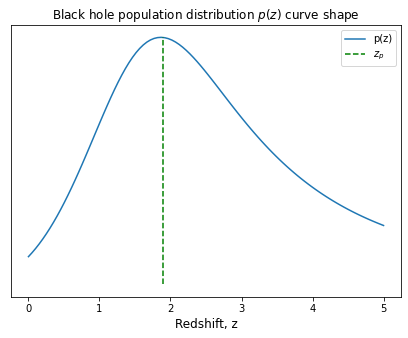

In [45]:
plt.figure(figsize=(7, 5))
plt.title('Black hole population distribution $p(z)$ curve shape')

plt.plot(z1,pz,label='p(z)')
plt.yticks([]) 
plt.vlines(z_p,0,pz.max(),linestyles='dashed',color='green',label='$z_p$')
plt.xlabel('Redshift, z',fontsize='12')
plt.legend()
plt.show()

#now we are not showing y tick parameter yet because ..... the distribution is still needed to be normalised

### 1.1 Changing the probability distribution function(PDF) to cumulative distribution function (CDF)
An important step for doing Inverse Transform Sampling is getting the Cumulative Distribution of the probability distribution $p(z)$ by integrating and normalising. So that the resulting function maps our original variable $(z)$ to variable that ranges from 0 to 1.  

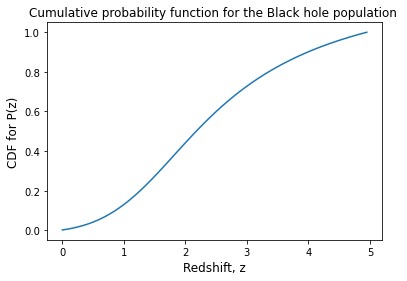

In [46]:
CDFz  = integrate.cumtrapz(pz,z1) # integrate the function and plot it out as cumulative distribution
nCDFz = CDFz/CDFz[-1]             # normalise the function

plt.title('Cumulative probability function for the Black hole population ')
plt.plot(z1[:-1], nCDFz)
plt.ylabel('CDF for P(z)',fontsize='12')
plt.xlabel('Redshift, z',fontsize='12')
plt.show()

## 1.2 Sampling
 Now we can generate uniform random numbers between 0 and 1 into the INVERSE of the CDFs 

In [54]:
# 10000 random sample (except our function does not except exact 0)
sample = np.random.uniform( 0.01,1,10000 )       

intpZ  = interpolate.interp1d( nCDFz,z1[:-1] ) 
newz   = intpZ(sample)

### We discover that the 'randomly' generated, transformed into a random population that follows the population distribution that we had chosen. And that if we increase the sample number..i.e. approaching infinity, we recover exactly the smooth distribution; p(z)

### This is shown below

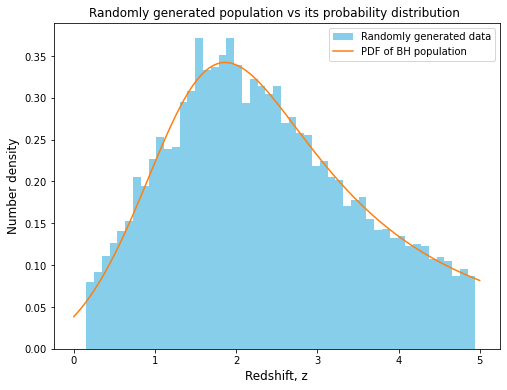

In [78]:
plt.figure(figsize=(8, 6))

plt.title('Randomly generated population vs its probability distribution ',fontsize='12')
plt.hist( newz, 50, facecolor='skyblue', density=True, label='Randomly generated data' )
plt.plot( z1, pz/CDFz[-1], label='PDF of BH population')   
plt.ylabel('Number density',fontsize='12')
plt.xlabel('Redshift, z',fontsize='12')
plt.legend()
plt.show()

## 2. Same method now but with population distribution in mass
## Mass population distribution
## $ p(m)\propto m^{(-2/3)} $

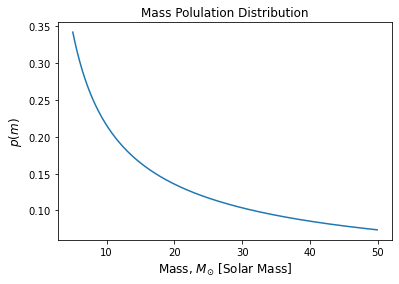

In [63]:
m  = np.arange(5,50,0.1)
pm = m **(-2/3)

plt.title('Mass Polulation Distribution')
#plt.loglog()
plt.plot(m,pm)
plt.ylabel('$ p(m) $', fontsize='12')
plt.xlabel('Mass, $M_{\odot}$ [Solar Mass]', fontsize='12')

plt.show()

### Following the exact same method as above

In [70]:
CDFm  = integrate.cumtrapz(pm,m)      #integrate the function and plot it out as cumulative distribution

intpm = interpolate.interp1d( nCDFm,m[:-1] ) #x y
newm  = intpm(sample)

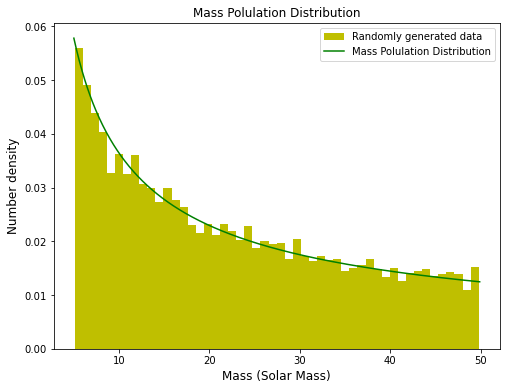

In [76]:
plt.figure(figsize=(8, 6))
plt.title('Mass Polulation Distribution',fontsize='12')

plt.hist(newm,50, facecolor='y',density=True,label='Randomly generated data')
plt.plot(m, pm/CDFm[-1], color='green',label='Mass Polulation Distribution') 
plt.ylabel('Number density',fontsize='12')
plt.xlabel('Mass (Solar Mass)',fontsize='12')

plt.legend()
plt.show()

### WE see that the randomly generated data here also recover the original mass population distribution.
### This is useful when we want to simulate a realistic population data i.e. blackhole population according to whatever parameter we're interested in
